In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [4]:
np.random.seed(42)

num_samples = 500
years_of_experience = np.random.randint(1 , 21 , size= num_samples)
slope = (200_000 - 60)/ 18
intercept = 60_000

salary = slope * years_of_experience + intercept + np.random.normal(0 , 10_000 , size= num_samples)

data = {
    'years_of_experience' : years_of_experience,
    'salary' :salary
}

df = pd.DataFrame(data = data)

In [5]:
df.describe()

,years_of_experience,salary
count,500.000000,500.000000
mean,10.176000,173516.884757
std,6.035717,68326.558584
min,1.000000,45325.623481
25%,5.000000,111035.565462
50%,10.000000,169677.886708
75%,16.000000,234461.477310
max,20.000000,301995.476832


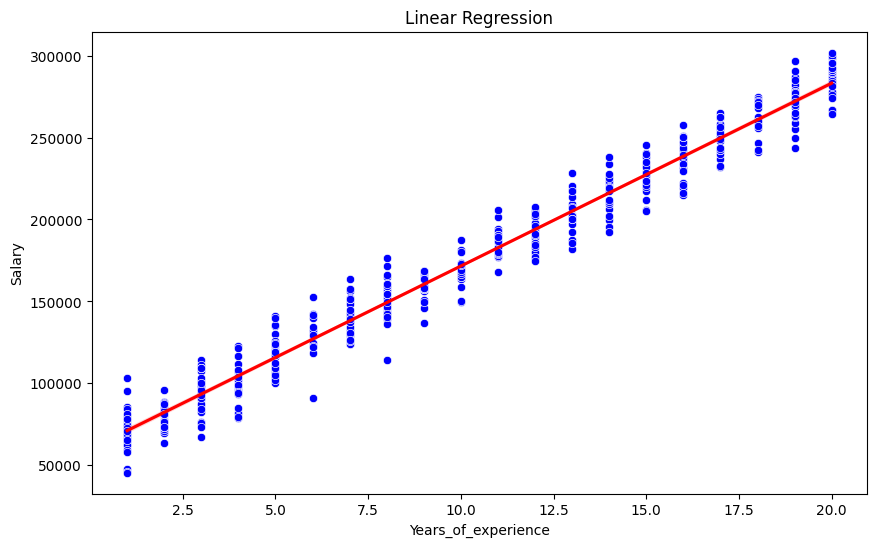

In [6]:
plt.figure(figsize= (10 , 6))
sns.scatterplot(x = 'years_of_experience' , y = 'salary' , data = df , color = 'blue')
sns.regplot(x = 'years_of_experience' , y = 'salary' , data = df , scatter= False , color= 'red')

plt.xlabel('Years_of_experience')
plt.ylabel('Salary')
plt.title("Linear Regression")

plt.show()

In [7]:
X = df[['years_of_experience']]
y = df[['salary']]

In [8]:
X_train , X_test , y_train ,y_test = train_test_split(X , y , test_size= 0.2 , random_state=19)

In [9]:
lr = LinearRegression()

In [10]:
lr.fit(X_train , y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [11]:
lr.score(X_train , y_train)

0.9733507446763712

In [12]:
from sklearn.metrics import mean_absolute_error, mean_squared_error , r2_score

In [13]:
y_pred = lr.predict(X_test)

In [14]:
mean_absolute_error(y_test, y_pred)

7421.299264606007

In [15]:
mean_squared_error(y_test , y_pred)

89318032.45181955

In [16]:
r2_score(y_test , y_pred)

0.9798163384119849

In [17]:
lr.coef_

array([[11157.51994379]])

In [18]:
lr.intercept_

array([59905.48072714])

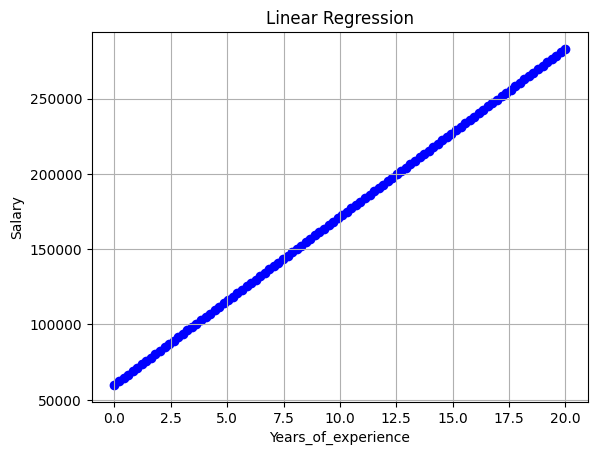

In [19]:
coefficients = lr.coef_
intercept = lr.intercept_

X = np.linspace(0, 20 , 100)
y = coefficients * X + intercept

plt.scatter(X , y , label=f'y = {coefficients[0]}x + {intercept}' ,color = 'blue')
plt.xlabel('Years_of_experience')
plt.ylabel('Salary')
plt.title('Linear Regression')

plt.grid(True)
plt.show()